In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14.7,8.27)})

In [3]:
store = pd.read_csv(
    "data/store.csv"
)
new_train = pd.read_csv("data/new_train.csv",index_col=0, dtype={"StateHoliday": object})
data = store.merge(new_train,on="Store")
data["Date"] = pd.to_datetime(data["Date"])
data["CompetitionDistance"].fillna(-1, inplace=True)

data["HasCompetition"] = np.where(data["CompetitionOpenSinceMonth"] >= 0, 1, 0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864627 entries, 0 to 864626
Data columns (total 19 columns):
Store                        864627 non-null int64
StoreType                    864627 non-null object
Assortment                   864627 non-null object
CompetitionDistance          864627 non-null float64
CompetitionOpenSinceMonth    589729 non-null float64
CompetitionOpenSinceYear     589729 non-null float64
Promo2                       864627 non-null int64
Promo2SinceWeek              431040 non-null float64
Promo2SinceYear              431040 non-null float64
PromoInterval                431040 non-null object
DayOfWeek                    864627 non-null int64
Date                         864627 non-null datetime64[ns]
Sales                        864627 non-null int64
Customers                    864627 non-null int64
Open                         864627 non-null int64
Promo                        864627 non-null int64
StateHoliday                 864627 non-null object

In [5]:
int_cols = ["CompetitionOpenSinceYear", "CompetitionOpenSinceMonth", "Promo2SinceYear",
            "Promo2SinceWeek", 
           ]
data[int_cols] = data[int_cols].fillna(-1)
data[int_cols] = data[int_cols].astype(int)

In [6]:
data.groupby("Store").mean().sort_values(by="Sales", ascending=False).head()

# Open/Closed -> high
# DayOfWeek -> medium
# Holiday -> medium
# Store -> high

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,HasCompetition
Store,,,,,,,,,,,,,
262,1180.0,5.0,2013.0,0.0,-1.0,-1.0,4.0,20771.417391,3407.146584,1.000000,0.378882,0.182609,1.0
562,1210.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,18006.562733,3104.188820,1.000000,0.378882,0.233540,0.0
817,140.0,3.0,2006.0,0.0,-1.0,-1.0,4.0,17789.629814,2557.583851,0.833540,0.378882,0.190062,1.0
1114,870.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,17394.627329,2695.827329,0.833540,0.378882,0.182609,0.0
251,340.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,15797.045963,2031.773913,0.827329,0.378882,0.193789,0.0


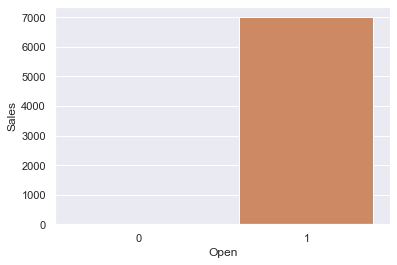

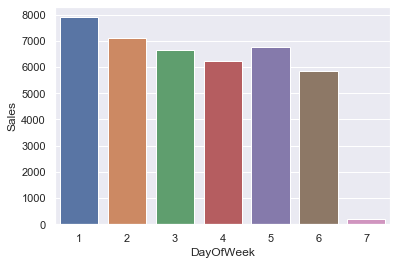

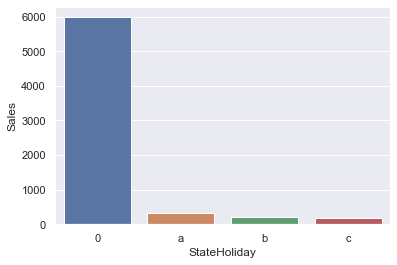

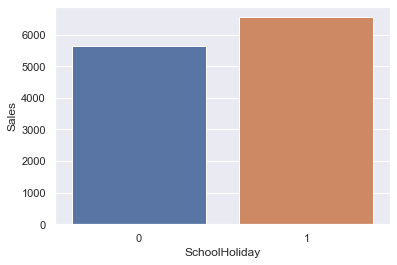

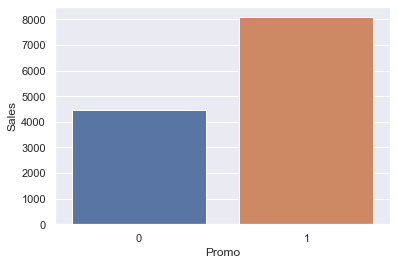

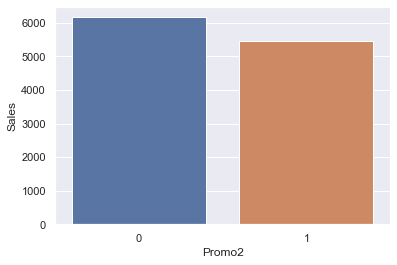

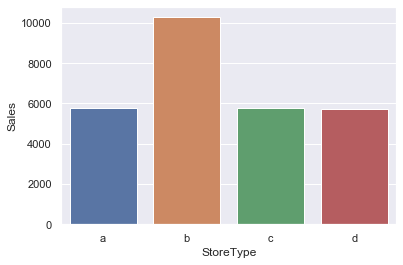

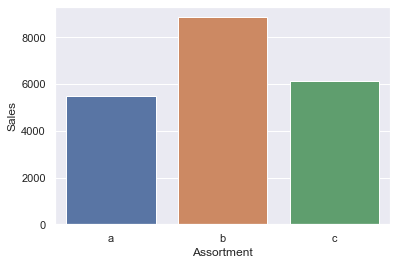

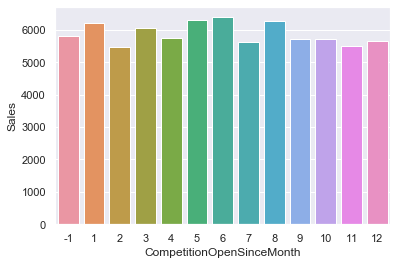

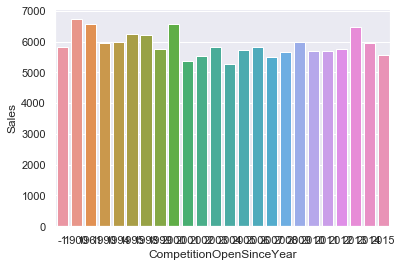

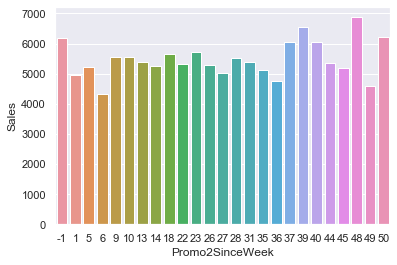

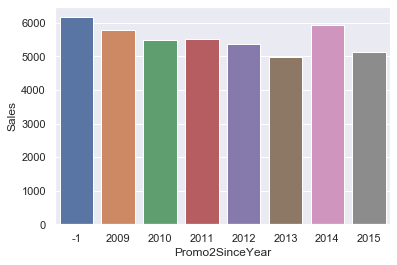

<Figure size 432x288 with 0 Axes>

In [7]:
categoricals_to_graph = ["Open", "DayOfWeek", "StateHoliday", "SchoolHoliday", 
            "Promo", "Promo2", "StoreType", "Assortment", "CompetitionOpenSinceMonth",
            "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"
           ]

for column in categoricals_to_graph: 
    column_year_sales = data.groupby(column).mean()["Sales"].to_frame().reset_index()
    sns.barplot(column_year_sales[column], column_year_sales["Sales"])
    plt.figure()

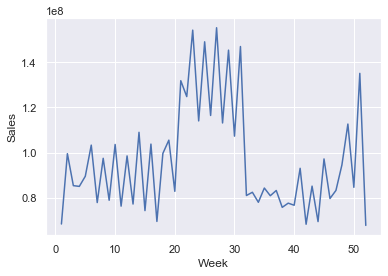

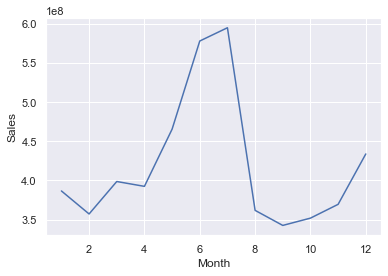

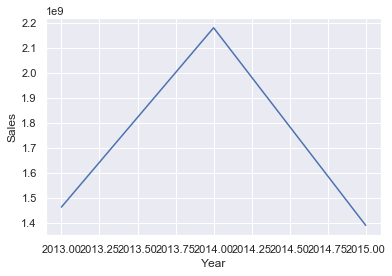

In [8]:
days_with_low_sales = data[data["Sales"] > 3006.0 ]

# time_series_data = data.copy()
# time_series_data.set_index(time_series_data["Date"],inplace=True)
# time_series_data.head()

# average months/week
weekly_data = data.groupby(data['Date'].dt.week).sum()["Sales"]
monthly_data = data.groupby(data['Date'].dt.month).sum()["Sales"]
yearly_data = data.groupby(data['Date'].dt.year).sum()["Sales"]

data["Week"] = data["Date"].dt.week
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year

ax = sns.lineplot(data=weekly_data)
ax.set(xlabel='Week', ylabel='Sales');
plt.show()

ax = sns.lineplot(data=monthly_data)
ax.set(xlabel='Month', ylabel='Sales');
plt.show()


ax = sns.lineplot(data=yearly_data)
ax.set(xlabel='Year', ylabel='Sales')
plt.show()

## Note: Ask Adam how to make barplots out of the above

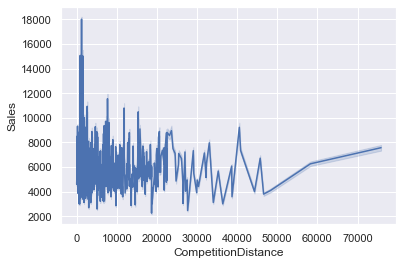

In [9]:
sns.lineplot(x="CompetitionDistance",y="Sales", data=data)

In [10]:
from sklearn.model_selection import train_test_split

data = pd.get_dummies(data)

X=data.drop(["Sales","Date"], axis=1)
y=data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)


In [ ]:
data.isna().any()